In [2]:
import keras


Using TensorFlow backend.


In [3]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data() 


In [4]:

import matplotlib.pyplot as plt


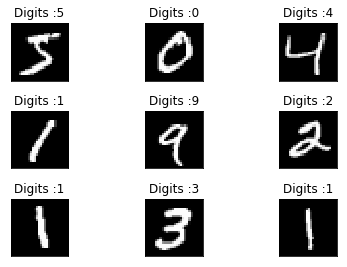

In [5]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i] , cmap='gray' ,interpolation=None)
    plt.title("Digits :{}".format( y_train[i]))
    plt.xticks([])
    plt.yticks([])
    

In [6]:
img_rows = 28
img_cols = 28
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0] , 1 , img_rows , img_cols)
    X_test = X_test.reshape(X_test.shape[0] , 1 , img_rows ,img_cols)
    input_shape = (1 , img_rows , img_cols)
else :
    X_train = X_train.reshape(X_train.shape[0] , img_rows , img_cols ,1)
    X_test = X_test.reshape(X_test.shape[0] , img_rows ,img_cols, 1)
    input_shape  =(img_rows ,img_cols ,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape )
    

X_train shape: (60000, 28, 28, 1)


In [7]:
num_category = 10
y_test = keras.utils.to_categorical(y_test , num_category)
y_train = keras.utils.to_categorical(y_train , num_category)


In [8]:
from keras.layers.core import Dense , Activation, Dropout ,Flatten
from keras.layers.convolutional import Conv2D ,MaxPooling2D
from keras.models import Sequential




In [9]:
model = Sequential()

In [10]:
model.add(Conv2D(32 ,(3 ,3) , activation='relu' ,input_shape = (28,28,1)))
model.add(Conv2D(64 ,(3 ,3) , activation='relu' ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128 , activation= 'relu' ))
model.add(Dropout(0.5))
model.add(Dense(num_category ,activation='softmax'))


In [11]:
model.compile(loss= keras.losses.categorical_crossentropy ,
              optimizer= keras.optimizers.Adadelta() , metrics=['accuracy'])



In [14]:
batch_size = 128
num_epoch = 10
#model training
history = model.fit(X_train , y_train , batch_size= 128 , epochs= 5 ,verbose= 1)
test_loss ,test_acc = model.evaluate(X_test , y_test)

Epoch 1/5
60000/60000 [==============================] - 241s 4ms/step - loss: 0.1723 - acc: 0.9489
Epoch 2/5
60000/60000 [==============================] - 226s 4ms/step - loss: 0.0845 - acc: 0.9751
Epoch 3/5
60000/60000 [==============================] - 227s 4ms/step - loss: 0.0635 - acc: 0.9807
Epoch 4/5
60000/60000 [==============================] - 226s 4ms/step - loss: 0.0536 - acc: 0.9834
Epoch 5/5
10000/10000 [==============================] - 12s 1ms/step


In [16]:
model_to_json = model.to_json()
with open("model.json" , "w") as json_file:
    json_file.write(model_to_json)
model.save_weights("model_digits.h5")
print("Saved model to disk")

Saved model to disk
